Performing Topic Modeling and Clustering Techniques (Unsupervised Learning)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NLP_DrugReviews/drug_reviews_sh.csv")
df.dropna(inplace=True)

In [ ]:
df

,Drug,Review,Rating,Condition,Year
0,Acetaminophen,I have mild rheumatoid arthritis which has bee...,2.3,Joint Damage causing Pain and Loss of Function,2022
1,Acetaminophen,"Besides relieving my pain, I FEEL better .. em...",5.0,Head Pain,2022
2,Acetaminophen,I took Tylenol Extra Strength Caplets every 6 ...,5.0,Pain,2021
3,Acetaminophen,I love this drug. I use it and within 15 minut...,5.0,Painful Periods,2021
4,Acetaminophen,I accidentally took almost 6000 mg of this in ...,5.0,Head Pain,2020
...,...,...,...,...,...
12260,Metoclopramide,I do not like the side effects of this drug.I ...,3.0,Nausea and Vomiting,2008
12261,Metoclopramide,This didn't work for me at all.,2.0,Feel Like Throwing Up,2007
12262,Metoclopramide,forget to take it 30 min. before eating,2.7,Condition in which Stomach Acid is Pushed Into...,2007
12263,Metoclopramide,This medication significantly helps with nause...,3.7,Stomach Muscle Paralysis and Decreased Function,2007


In [ ]:
# Preprocessing

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords and lemmatize
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split() if word not in stopwords.words('english')])
    return text

df['Preprocessed_Review'] = df['Review'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Vectorizing
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.8, min_df=3, stop_words='english')
X = vectorizer.fit_transform(df['Preprocessed_Review'])

In [ ]:
import numpy as np
# Calculate sparsity
sparsity = 1.0 - (np.count_nonzero(X.toarray()) / float(X.shape[0] * X.shape[1]))
print("Sparsity of TF-IDF matrix:", sparsity)


Sparsity of TF-IDF matrix: 0.9962625869117829


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of clusters: 10


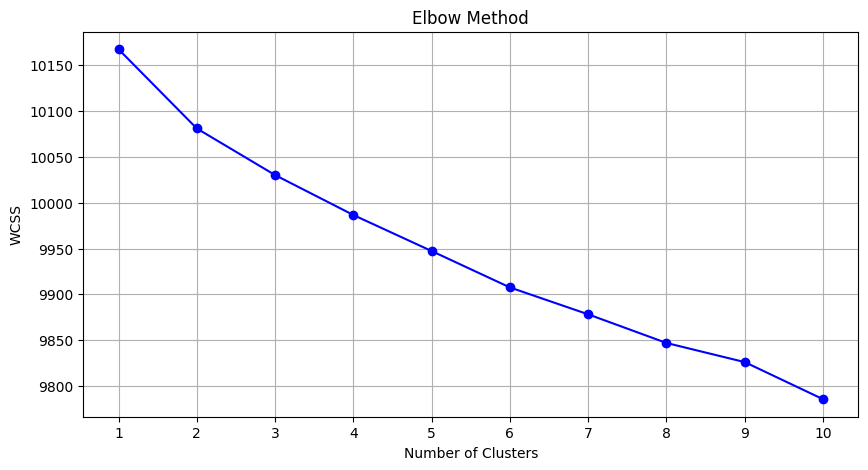

In [ ]:
# Clustering

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Elbow method to determine the optimal number of clusters
wcss = []
silhouette_scores = []
max_clusters = 10  # Adjust

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

labels = kmeans.labels_
unique_labels = set(labels)
num_clusters = len(unique_labels)
print("Number of clusters:", num_clusters)

# Plotting the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()


In [ ]:
# Perform KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

In [ ]:
df['cluster'] = kmeans.labels_
df

,Drug,Review,Rating,Condition,Year,Preprocessed_Review,cluster
0,Acetaminophen,I have mild rheumatoid arthritis which has bee...,2.3,Joint Damage causing Pain and Loss of Function,2022,mild rheumatoid arthritis well controlled meth...,0
1,Acetaminophen,"Besides relieving my pain, I FEEL better .. em...",5.0,Head Pain,2022,besides relieving pain feel better emotionally...,3
2,Acetaminophen,I took Tylenol Extra Strength Caplets every 6 ...,5.0,Pain,2021,took tylenol extra strength caplets every hour...,0
3,Acetaminophen,I love this drug. I use it and within 15 minut...,5.0,Painful Periods,2021,love drug use within minute hour feel much bet...,1
4,Acetaminophen,I accidentally took almost 6000 mg of this in ...,5.0,Head Pain,2020,accidentally took almost mg one dose must say ...,4
...,...,...,...,...,...,...,...
12260,Metoclopramide,I do not like the side effects of this drug.I ...,3.0,Nausea and Vomiting,2008,like side effect drugi suffered unusual tounge...,0
12261,Metoclopramide,This didn't work for me at all.,2.0,Feel Like Throwing Up,2007,didnt work,2
12262,Metoclopramide,forget to take it 30 min. before eating,2.7,Condition in which Stomach Acid is Pushed Into...,2007,forget take min eating,0
12263,Metoclopramide,This medication significantly helps with nause...,3.7,Stomach Muscle Paralysis and Decreased Function,2007,medication significantly help nausea heartburn...,4


In [ ]:
df['cluster'].value_counts()

0    5192
1    2098
4    2042
3     709
2     421
Name: cluster, dtype: int64

In [ ]:
# Grouping by 'cluster'
grouped_df = df.groupby('cluster')

# Define a function to get the most common condition and its count within each cluster
def most_common_condition(group):
    mode = group['Condition'].mode()
    count = group['Condition'].value_counts().max()
    return pd.Series([mode.values[0], count], index=['most_common_condition', 'count'])

most_common_conditions_with_count = grouped_df.apply(most_common_condition)

print(most_common_conditions_with_count)

        most_common_condition  count
cluster                             
0                       Other    733
1                        Pain    876
2                        Pain    110
3         High Blood Pressure    296
4                       Other    298


In [ ]:
# Examine the 2 pain and 2 other clusters to see if there is any difference

In [ ]:
# Most common drugs in clusters 1 and 2 (Pain clusters)

# Grouping by 'cluster'
grouped_df = df.groupby('cluster')

# Define a function to get the most common drugs and their counts within each cluster
def most_common_drugs(group):
    mode = group['Drug'].mode()
    count = group['Drug'].value_counts().max()
    return pd.Series([mode.values[0], count], index=['most_common_drug', 'count'])

# Apply the function to clusters 1 and 2
most_common_drugs_cluster_1 = most_common_drugs(grouped_df.get_group(1))
most_common_drugs_cluster_2 = most_common_drugs(grouped_df.get_group(2))

print("Cluster 1:")
print(most_common_drugs_cluster_1)
print("\nCluster 2:")
print(most_common_drugs_cluster_2)

Cluster 1:
most_common_drug    Tramadol
count                   1189
dtype: object

Cluster 2:
most_common_drug    Tramadol
count                    160
dtype: object


In [ ]:
# Most common drugs in clusters 0 and 4 (Other clusters)

# Grouping by 'cluster'
grouped_df = df.groupby('cluster')

# Define a function to get the most common drugs and their counts within each cluster
def most_common_drugs(group):
    mode = group['Drug'].mode()
    count = group['Drug'].value_counts().max()
    return pd.Series([mode.values[0], count], index=['most_common_drug', 'count'])

# Apply the function to clusters 0 and 4
most_common_drugs_cluster_0 = most_common_drugs(grouped_df.get_group(0))
most_common_drugs_cluster_4 = most_common_drugs(grouped_df.get_group(4))

print("Cluster 1:")
print(most_common_drugs_cluster_0)
print("\nCluster 2:")
print(most_common_drugs_cluster_4)

Cluster 1:
most_common_drug    Tramadol
count                    910
dtype: object

Cluster 2:
most_common_drug    Metronidazole
count                         448
dtype: object


In [ ]:
# It seems like we can narrow our clusters down to Pain, High Blood Pressure and Other

cluster_mapping = {4: 0, 2: 1, 3: 2}
df['cluster'] = df['cluster'].replace(cluster_mapping)

In [ ]:
df['cluster'].value_counts()

0    7234
1    2519
2     709
Name: cluster, dtype: int64

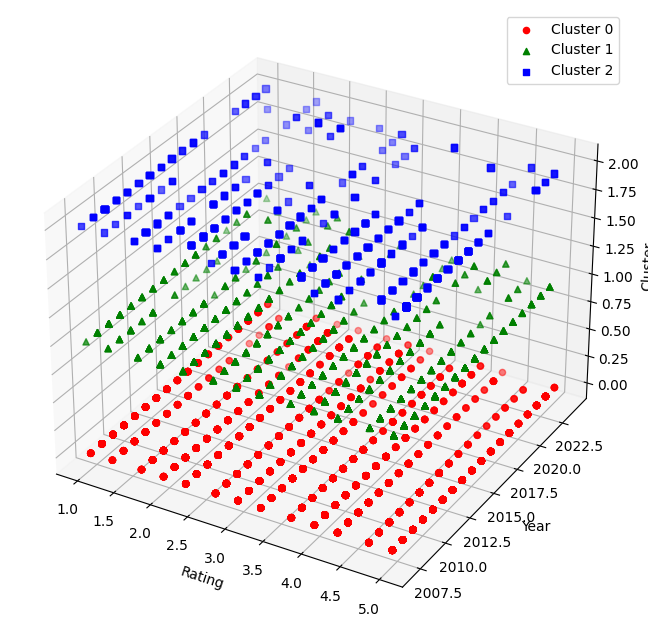

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Filter data for each cluster
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]
cluster_2 = df[df['cluster'] == 2]

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data points for each cluster
ax.scatter(cluster_0['Rating'], cluster_0['Year'], [0] * len(cluster_0), c='r', marker='o', label='Cluster 0')
ax.scatter(cluster_1['Rating'], cluster_1['Year'], [1] * len(cluster_1), c='g', marker='^', label='Cluster 1')
ax.scatter(cluster_2['Rating'], cluster_2['Year'], [2] * len(cluster_2), c='b', marker='s', label='Cluster 2')

# Set labels and title
ax.set_xlabel('Rating')
ax.set_ylabel('Year')
ax.set_zlabel('Cluster')

# Add legend
ax.legend()

# Show plot
plt.show()


In [ ]:
# Analyzing Clusters

In [ ]:
# Calculate the mean rating for each cluster
mean_ratings = df.groupby('cluster')['Rating'].mean().reset_index()
mean_ratings

,cluster,Rating
0,0,3.460962
1,1,3.626638
2,2,3.233850


<ipython-input-31-72387343f93a>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=subset, x='Year', y='Rating', marker='o', palette=palette[cluster])
<ipython-input-31-72387343f93a>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=subset, x='Year', y='Rating', marker='o', palette=palette[cluster])
<ipython-input-31-72387343f93a>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=subset, x='Year', y='Rating', marker='o', palette=palette[cluster])


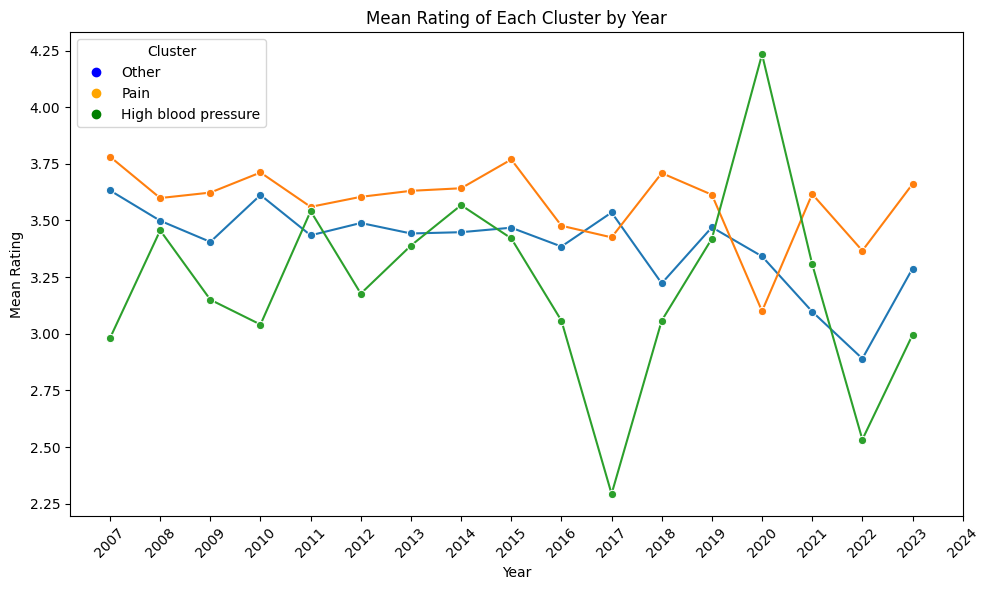

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Excluding the year 2024
df_filtered = df[df['Year'] != 2024]

# Calculate the mean rating for each cluster by year
mean_ratings_by_year = df_filtered.groupby(['Year', 'cluster'])['Rating'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']  # Define a color for each cluster

# Loop through each cluster to plot, allows for custom legend handling
for cluster in sorted(mean_ratings_by_year['cluster'].unique()):
    subset = mean_ratings_by_year[mean_ratings_by_year['cluster'] == cluster]
    sns.lineplot(data=subset, x='Year', y='Rating', marker='o', palette=palette[cluster])

# Custom legend
cluster_names = ['Other', 'Pain', 'High blood pressure']
plt.legend(title='Cluster', labels=cluster_names, handles=[plt.Line2D([0], [0], color=color, marker='o', linestyle='') for color in colors])

plt.xticks(df['Year'].unique(), rotation=45)
plt.title('Mean Rating of Each Cluster by Year')
plt.xlabel('Year')
plt.ylabel('Mean Rating')

plt.tight_layout()
plt.show()

In [ ]:
# Using Undersampling to handle class imbalance

In [ ]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['cluster'].isin([0, 1])]
df_minority = df[df['cluster'] == 2]

# Undersample majority class
df_majority_undersampled = pd.concat([
    resample(df_majority[df_majority['cluster'] == 0], replace=False, n_samples=709, random_state=42),
    resample(df_majority[df_majority['cluster'] == 1], replace=False, n_samples=709, random_state=42)
])

# Combine minority class with undersampled majority class
df_undersampled = pd.concat([df_majority_undersampled, df_minority])

# Shuffle the DataFrame
df_undersampled = df_undersampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(df_undersampled['cluster'].value_counts())

0    709
2    709
1    709
Name: cluster, dtype: int64


In [ ]:
# Predictive modeling using Distilbert as the base model

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertModel

# Define tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize the input texts
encodings = tokenizer(df_undersampled['Review'].tolist(), truncation=True, padding=True)

# Convert labels to tensor
labels = torch.tensor(df_undersampled['cluster'].tolist())

# Convert tokenized inputs to PyTorch tensors
input_ids = torch.tensor(encodings['input_ids'])
attention_masks = torch.tensor(encodings['attention_mask'])

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(
    input_ids, labels, random_state=42, test_size=0.2
)
train_masks, val_masks, _, _ = train_test_split(
    attention_masks, labels, random_state=42, test_size=0.2
)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Define DataLoader for training and validation
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_dataloader = DataLoader(train_data, batch_size=8, shuffle=True)

val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_dataloader = DataLoader(val_data, batch_size=8, shuffle=False)


In [ ]:
import torch.nn as nn
from transformers import AdamW

# Define the model architecture
class DistilBERTClassifier(nn.Module):
    def __init__(self):
        super(DistilBERTClassifier, self).__init__()
        self.distilbert = DistilBertModel.from_pretrained('distilbert-base-uncased')
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(768, 3)  # 3 classes

    def forward(self, input_ids, attention_mask):
        output = self.distilbert(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output[0]
        pooled_output = hidden_state[:, 0]  # Take the [CLS] token
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits

# Instantiate the model
model = DistilBERTClassifier()

In [ ]:
# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = nn.CrossEntropyLoss()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Train the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 3
for epoch in range(epochs):
    model.train()
    progress_bar = tqdm(train_dataloader, desc=f'Epoch {epoch + 1}', leave=False)
    for batch in progress_bar:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        optimizer.zero_grad()
        logits = model(input_ids, attention_mask)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item())})

    # Validation
    model.eval()
    val_preds = []
    val_true = []
    with torch.no_grad():
        for batch in tqdm(val_dataloader, desc='Validation', leave=False):
            input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
            logits = model(input_ids, attention_mask)
            preds = torch.argmax(logits, dim=1)
            val_preds.extend(preds.cpu().numpy())
            val_true.extend(labels.cpu().numpy())

    val_accuracy = accuracy_score(val_true, val_preds)
    val_precision, val_recall, val_f1, _ = precision_recall_fscore_support(val_true, val_preds, average='weighted')
    print(f"Epoch {epoch+1}: Validation Accuracy: {val_accuracy}, Precision: {val_precision}, Recall: {val_recall}, F1 Score: {val_f1}")


Epoch 1: Validation Accuracy: 0.9483568075117371, Precision: 0.9489984678105376, Recall: 0.9483568075117371, F1 Score: 0.94818710379664


Epoch 2: Validation Accuracy: 0.9530516431924883, Precision: 0.9532407642243126, Recall: 0.9530516431924883, F1 Score: 0.9528918565016943


Epoch 3: Validation Accuracy: 0.9436619718309859, Precision: 0.9436645936677398, Recall: 0.9436619718309859, F1 Score: 0.9433877341561554


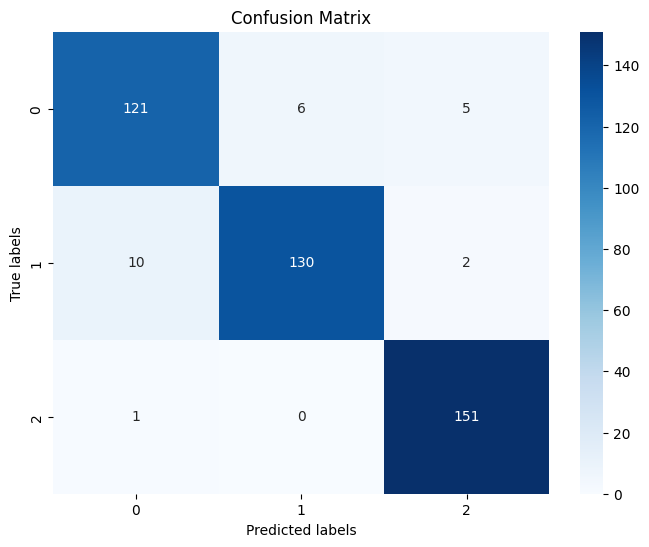

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predictions and true labels to numpy arrays
val_preds_np = np.array(val_preds)
val_true_np = np.array(val_true)

# Compute confusion matrix
conf_matrix = confusion_matrix(val_true_np, val_preds_np)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Save the trained model
torch.save(model.state_dict(), "/content/drive/MyDrive/NLP_DrugReviews/cluster_distilbert_model.pth")